<a href="https://colab.research.google.com/github/JhobanyT/archivo2_bigdata/blob/main/practica_archivo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRACTICA ARCHIVO 2

Importaciones

In [2]:
import pandas as pd

Data Frame

In [3]:
# Declaramos el archivo que tomaremos
url = ("https://raw.githubusercontent.com/JhobanyT/BigDataRepositorio/main/archivo_2.csv")

# Obtenemos nuestro Data Frame
df_arch_2 = pd.read_csv(url)

# Mostramos la cantidad de columnas y filas que tiene nuestro data frame
print(df_arch_2.shape)

# Mostramos los primero datos que contiene nuestro data frame
df_arch_2.head()

# Mostramos todo el data frame
df_arch_2

(14, 7)


,nombre,edad,genero,ciudad,ingresos,educacion,estado_civil
0,Juan,28,Masculino,Lima,4500,Universitario,Soltero
1,María,35,Femenino,Arequipa,3500,Secundaria,Casado
2,Luis,40,Masculino,Cusco,5200,Universitario,Casado
3,Ana,22,Femenino,Lima,2800,Universitario,Soltero
4,Walter,19,Masculino,Juliaca,3100,Técnico,Soltero
5,Pedro,30,Masculino,Arequipa,4000,Técnico,Soltero
6,Laura,27,Femenino,Lima,3200,Secundaria,Casado
7,Carlos,29,Masculino,Cusco,4800,Universitario,Comprometido
8,Sofía,25,Femenino,Lima,3000,Universitario,Soltero
9,Esmeralda,23,Femenino,Juliaca,3200,Universitario,Soltero


Mostramos las columnas que tenemos

In [4]:
df_arch_2.columns.values

array(['nombre', 'edad', 'genero', 'ciudad', 'ingresos', 'educacion',
       'estado_civil'], dtype=object)

Reconocemos que tipos de datos son nuestras columnas

In [5]:
df_arch_2.dtypes

nombre          object
edad             int64
genero          object
ciudad          object
ingresos         int64
educacion       object
estado_civil    object
dtype: object

Mostramos los datos desde el indice 3 al 5

In [6]:
df_arch_2[3:6]

,nombre,edad,genero,ciudad,ingresos,educacion,estado_civil
3,Ana,22,Femenino,Lima,2800,Universitario,Soltero
4,Walter,19,Masculino,Juliaca,3100,Técnico,Soltero
5,Pedro,30,Masculino,Arequipa,4000,Técnico,Soltero


Cantidad de personas por ciudad

In [7]:
df_arch_2.groupby('ciudad')['nombre'].count()

ciudad
Arequipa    3
Cusco       3
Juliaca     3
Lima        5
Name: nombre, dtype: int64

Genero dominante

In [8]:
df_arch_2.groupby('genero')['nombre'].count().sort_values(ascending=False).head(1)

genero
Masculino    8
Name: nombre, dtype: int64

Vemos las estadisticas

In [9]:
df_arch_2.describe()

,edad,ingresos
count,14.000000,14.000000
mean,29.285714,3792.857143
std,6.568322,722.670566
min,19.000000,2800.000000
25%,25.250000,3200.000000
50%,28.500000,3700.000000
75%,32.500000,4200.000000
max,42.000000,5200.000000


Obtenemos las personas que trabajan en Arequipa

In [10]:
personas_arequipa = df_arch_2[df_arch_2['ciudad'] == "Arequipa"]
personas_arequipa.iloc[:, [0,3]]

,nombre,ciudad
1,María,Arequipa
5,Pedro,Arequipa
10,Andrés,Arequipa


Obtenemos la suma de ingresos de cada ciudad

In [11]:
ingresos_ciudad = df_arch_2.groupby('ciudad')['ingresos'].sum()
ingresos_ciudad

ciudad
Arequipa    11700
Cusco       13600
Juliaca     10500
Lima        17300
Name: ingresos, dtype: int64

Obtenemos la media de ingresos de cada ciudad

In [12]:
media_ingresos_ciudad = df_arch_2.groupby('ciudad')['ingresos'].mean().astype(int)
media_ingresos_ciudad

ciudad
Arequipa    3900
Cusco       4533
Juliaca     3500
Lima        3460
Name: ingresos, dtype: int64

Persona con el mayor ingreso

In [13]:
# opcion 1
persona_mayor_ingreso = df_arch_2[df_arch_2['ingresos'] == df_arch_2['ingresos'].max()]

# opcion 2
# persona_mayor_ingreso = df_arch_2.nlargest(1, 'ingresos')

print(f"La persona que tiene el mayor ingreso es: {persona_mayor_ingreso['nombre'].values[0]}. Tiene un ingreso de: {persona_mayor_ingreso['ingresos'].values[0]}")

La persona que tiene el mayor ingreso es: Luis. Tiene un ingreso de: 5200


Persona con el menor ingreso

In [14]:
persona_menor_ingreso = df_arch_2.nsmallest(1, 'ingresos')
print(f"La persona que tiene el menor ingreso es: {persona_menor_ingreso['nombre'].values[0]}. Tiene un ingreso de: {persona_menor_ingreso['ingresos'].values[0]}")

La persona que tiene el menor ingreso es: Ana. Tiene un ingreso de: 2800


Histograma de edades

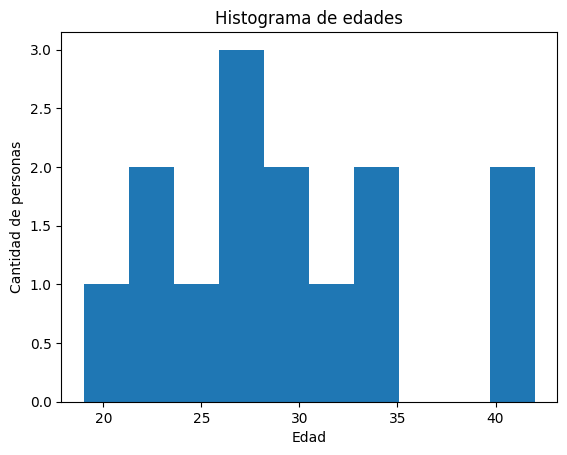

In [15]:
import matplotlib.pyplot as plt

edades = df_arch_2['edad']
plt.hist(edades)
plt.xlabel('Edad')
plt.ylabel('Cantidad de personas')
plt.title('Histograma de edades')
plt.show()

Hallamos la persona mas mayor

In [16]:
persona_mayor = df_arch_2.nlargest(1, "edad")
print(f"La persona mas mayor de todo es: {persona_mayor['nombre'].values[0]}, tiene {persona_mayor['edad'].values[0]} años")

La persona mas mayor de todo es: Ernesto, tiene 42 años


Hallamos la persona mas joven

In [17]:
persona_menor = df_arch_2.nsmallest(1, "edad")
print(f"La persona mas joven es: {persona_menor['nombre'].values[0]}, tiene {persona_menor['edad'].values[0]} años")

La persona mas joven es: Walter, tiene 19 años


Obtenemos la cantidad de personas por estado civil

In [18]:
# opcion 1
# cantidad_estado_civil = df_arch_2['estado_civil'].value_counts()

# opcion 2
cantidad_estado_civil = df_arch_2.groupby('estado_civil')['nombre'].count()

cantidad_estado_civil

estado_civil
Casado          5
Comprometido    2
Divorciado      1
Soltero         6
Name: nombre, dtype: int64

Promedio de ingresos de personas mayores a 30

In [19]:
promedio_ingresos_edad_mayor_30 = df_arch_2[(df_arch_2["edad"] > 30)]['ingresos'].mean()
print(f"El promedio de ingresos de las personas mayores a 30 años es: {int(promedio_ingresos_edad_mayor_30)}")

El promedio de ingresos de las personas mayores a 30 años es: 4180


Agregamos la columna de impuestos al DF

In [20]:
df_arch_2['impuestos'] = df_arch_2['ingresos'] * 0.1
df_arch_2.head()

,nombre,edad,genero,ciudad,ingresos,educacion,estado_civil,impuestos
0,Juan,28,Masculino,Lima,4500,Universitario,Soltero,450.0
1,María,35,Femenino,Arequipa,3500,Secundaria,Casado,350.0
2,Luis,40,Masculino,Cusco,5200,Universitario,Casado,520.0
3,Ana,22,Femenino,Lima,2800,Universitario,Soltero,280.0
4,Walter,19,Masculino,Juliaca,3100,Técnico,Soltero,310.0


Generamos otro DF pero solamente de la ciudad de Lima

In [21]:
df_lima = df_arch_2[(df_arch_2['ciudad'] == "Lima")]
df_lima

,nombre,edad,genero,ciudad,ingresos,educacion,estado_civil,impuestos
0,Juan,28,Masculino,Lima,4500,Universitario,Soltero,450.0
3,Ana,22,Femenino,Lima,2800,Universitario,Soltero,280.0
6,Laura,27,Femenino,Lima,3200,Secundaria,Casado,320.0
8,Sofía,25,Femenino,Lima,3000,Universitario,Soltero,300.0
11,Gabriela,31,Femenino,Lima,3800,Universitario,Divorciado,380.0


Obtenemos la suma total de ingresos de la ciudad de lima

In [22]:
print(f"La suma de ingresos de la ciudad de lima es: {df_lima['ingresos'].sum()}")

La suma de ingresos de la ciudad de lima es: 17300


Obtenemos el promedio de ingresos de la ciudad de lima

In [23]:
promedio_lima = df_lima['ingresos'].mean()
print(f"El promedio de ingresos de la ciudad de lima es de: {promedio_lima}")

El promedio de ingresos de la ciudad de lima es de: 3460.0


Generamos otro DF pero de las personas que obtienen un ingreso mayor a 3900

In [24]:
df_ingreso_mayor_3900 = df_arch_2[(df_arch_2["ingresos"] > 3900)]
df_ingreso_mayor_3900

,nombre,edad,genero,ciudad,ingresos,educacion,estado_civil,impuestos
0,Juan,28,Masculino,Lima,4500,Universitario,Soltero,450.0
2,Luis,40,Masculino,Cusco,5200,Universitario,Casado,520.0
5,Pedro,30,Masculino,Arequipa,4000,Técnico,Soltero,400.0
7,Carlos,29,Masculino,Cusco,4800,Universitario,Comprometido,480.0
10,Andrés,33,Masculino,Arequipa,4200,Universitario,Casado,420.0
13,Ernesto,42,Masculino,Juliaca,4200,Técnico,Casado,420.0


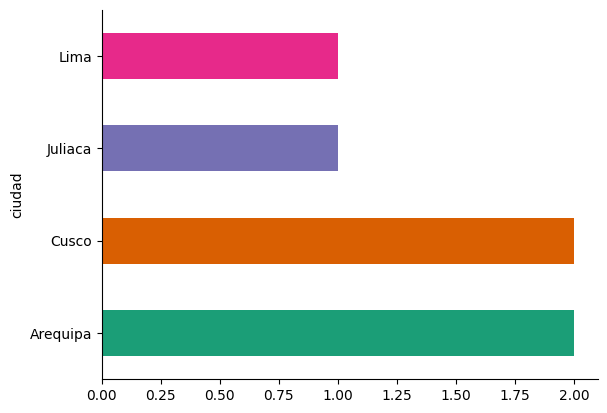

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
df_ingreso_mayor_3900.groupby('ciudad').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Conteo de nivel de educacion de los que ganan mas de 3900

In [26]:
print(df_ingreso_mayor_3900["educacion"].value_counts())

educacion
Universitario    4
Técnico          2
Name: count, dtype: int64


Cual es el nivel de educacion mayor de los que ganan mas de 3900

In [27]:
print(df_ingreso_mayor_3900["educacion"].value_counts().sort_values(ascending=False).head(1))

educacion
Universitario    4
Name: count, dtype: int64


NUEVO DF DE LA CIUDAD DONDE HAY MAS PERSONAS Y QUE GANEN MAS DE 3700

In [32]:
df_ciudad_ingreso_mayor_3700 = df_arch_2[
    (df_arch_2['ciudad'] == df_arch_2['ciudad'].value_counts().index[0]) & (df_arch_2['ingresos'] > 3700)
]

df_ciudad_ingreso_mayor_3700

,nombre,edad,genero,ciudad,ingresos,educacion,estado_civil,impuestos
0,Juan,28,Masculino,Lima,4500,Universitario,Soltero,450.0
11,Gabriela,31,Femenino,Lima,3800,Universitario,Divorciado,380.0


NUEVO DF DE LA CIUDAD MENOS REPETIDA Y QUE GANEN MENOS DE 4000

In [33]:
df_menos_repetida = df_arch_2[df_arch_2['ciudad'] == df_arch_2['ciudad'].value_counts().index[-1]]
df_menos_repetida_ingresos_menores = df_menos_repetida[df_menos_repetida['ingresos'] < 4000]

print(df_menos_repetida_ingresos_menores)

      nombre  edad     genero   ciudad  ingresos      educacion estado_civil  \
4     Walter    19  Masculino  Juliaca      3100        Técnico      Soltero   
9  Esmeralda    23   Femenino  Juliaca      3200  Universitario      Soltero   

   impuestos  
4      310.0  
9      320.0  
